In [1]:
!pip install yfinance ta
# !pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=41e82dd02d36c1b44dea74fdc71490fa8c5dc5a128aab6d3d36316c0d661bee2
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=290463 sha256=4404ad03c6962a658497d5ccca10a4c7f2fe5365f8968ae727ad945cf19d5f97
  Stored in directory: /root/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built ta peewee


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading dataset
We have used yfinance to download data of SBIN

In [4]:
from datetime import datetime
import yfinance as yf
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

data = yf.download("SBIN.NS", start, end,interval="1d",progress=False)
data = data.resample('D').asfreq()
data=data.interpolate(method='linear')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25,506.500000,515.450012,497.850006,506.500000,489.210358,35619415.0
2021-10-26,507.600006,518.200012,507.600006,512.549988,495.053833,21107457.0
2021-10-27,513.700012,526.849976,512.750000,519.150024,501.428589,29463032.0
2021-10-28,519.599976,520.549988,497.600006,501.350006,484.236176,28140401.0
2021-10-29,501.500000,512.650024,488.399994,502.149994,485.008850,31355893.0


from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

<Axes: xlabel='Date'>

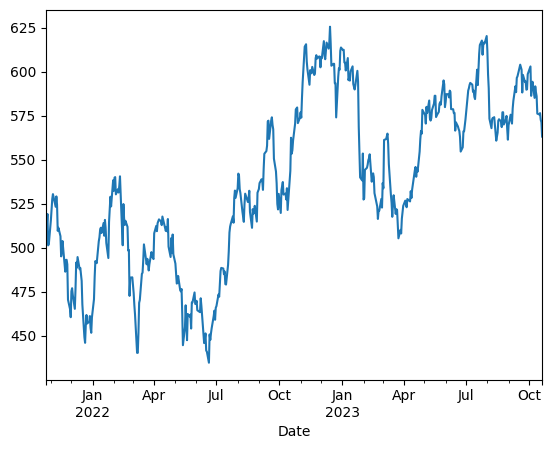

In [5]:
data['Close'].plot()

In [6]:
#trend looks linear so d=1

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

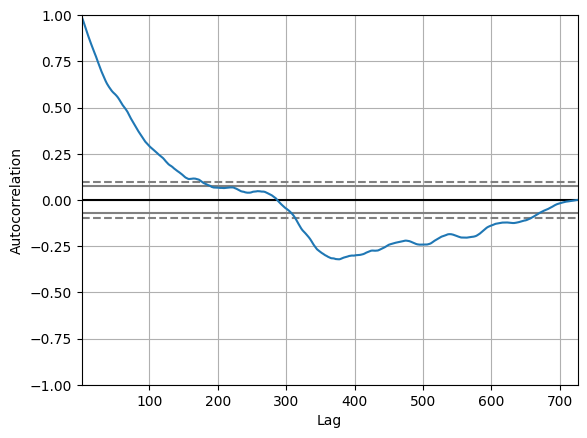

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])

In [8]:
#passes confidence interval just after lag=200 so q=200


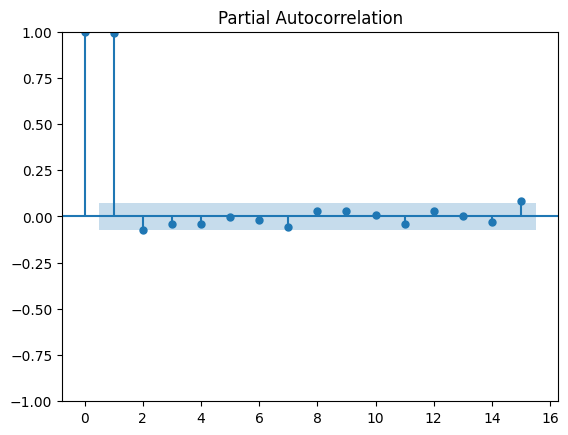

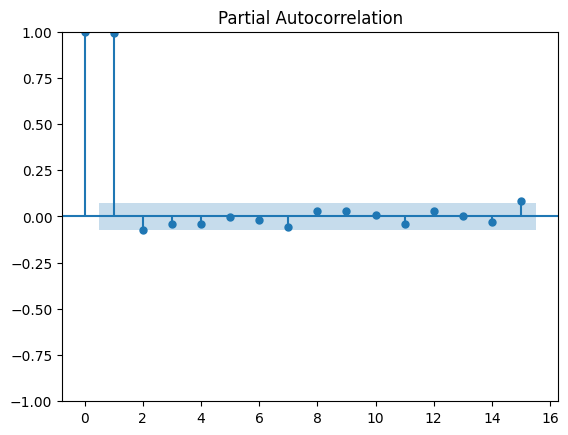

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Close'], lags=15)

In [10]:
#passes confidence line after lag=1 so p=1

In [11]:
#trend looks linear so D=1 for ARIMA


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

def test_model(data,order=(1,1,5)):
    preds_arima = []

    train_size= (len(data)-100)
    train = data.Close.iloc[0:train_size]
    test = data.Close.iloc[train_size:]

    actual= test.values

    d=train
    for t in test:
        model_arima = ARIMA(d, order=(1,1,5)).fit()
        y=model_arima.forecast()
        preds_arima.append(y[0])
        d= np.append(d,t)

    return actual, preds_arima


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
actual, preds_arima = test_model(data,order=(1,1,5))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(actual, preds_arima)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, preds_arima)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual, preds_arima)

print(f"Mean Absolute Percentage Error (MAPE): {100*mape}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Percentage Error (MAPE): 0.6282279078896222
Mean Absolute Error (MAE): 3.684784209587166
Mean Squared Error (MSE): 27.099132840957832
